In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Pairs Comparison

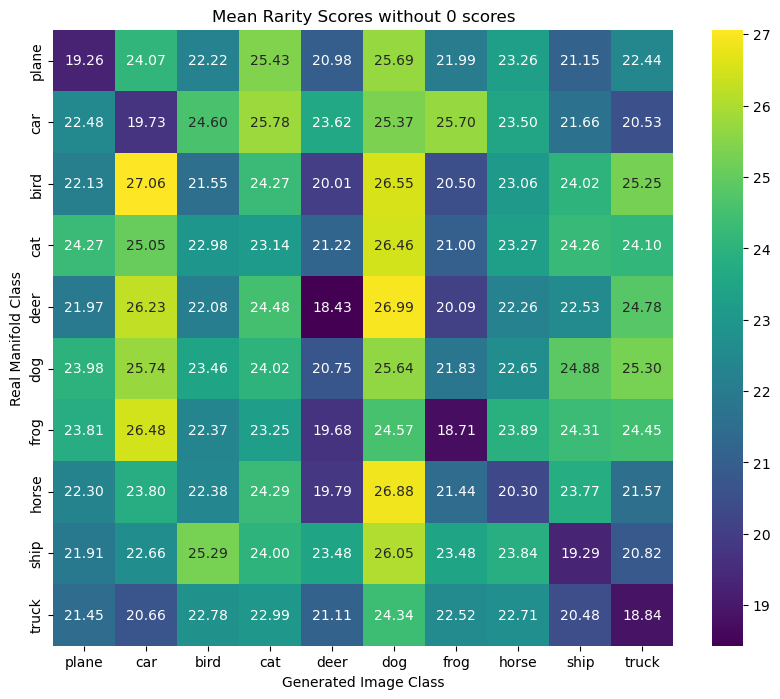

23.04414225978236
[[19.26051996 24.07124751 22.22490734 25.42829902 20.98334908 25.68835356
  21.98605324 23.25601104 21.14786241 22.44139808]
 [22.47994166 19.73268968 24.59586705 25.77796445 23.61915591 25.37427393
  25.70048686 23.50072102 21.66375852 20.53276225]
 [22.12585903 27.06436986 21.54949727 24.2683174  20.00816009 26.5477359
  20.49848248 23.06071104 24.01798819 25.24621242]
 [24.27024879 25.05057017 22.98340863 23.13931014 21.22388796 26.45985824
  20.99535897 23.26516449 24.26163757 24.09728706]
 [21.97193531 26.23088585 22.08469654 24.48170693 18.43218989 26.99328655
  20.08599012 22.26199154 22.52952505 24.77852094]
 [23.98010427 25.73671117 23.46109389 24.01574076 20.75220829 25.63606143
  21.82826683 22.65005559 24.88487734 25.29772509]
 [23.81287272 26.47800155 22.37215782 23.24748797 19.68222167 24.56812901
  18.71401909 23.89483189 24.30544134 24.44607844]
 [22.29693211 23.79876738 22.37907359 24.2887373  19.78923232 26.88408048
  21.44281192 20.29731202 23.77020

In [2]:
classDict = {'plane': 0, 'car': 1, 'bird': 2, 'cat': 3, 'deer': 4,
             'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}

mean_scores_matrix = np.zeros((10, 10))


for filename in os.listdir('./'):
    # Extract the class numbers
    if filename.endswith("score.txt"):
        _, gen_class, real_class, _ = filename.split('_')
        _, real_class = real_class.split('against')
        # real_class = real_class.removesuffix(".txt")
        real_class, gen_class = int(real_class), int(gen_class)
        # Get the mean score 
        mean_score = np.loadtxt(filename)
        mean_score = np.mean(mean_score[mean_score!=0])
        
        mean_scores_matrix[real_class][gen_class] = mean_score

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(mean_scores_matrix, annot=True, fmt=".2f", cmap='viridis',
            xticklabels=classDict.keys(), yticklabels=classDict.keys())
plt.title('Mean Rarity Scores without 0 scores')
plt.xlabel('Generated Image Class')
plt.ylabel('Real Manifold Class')
plt.show()

print(np.mean(mean_scores_matrix))
print(mean_scores_matrix)

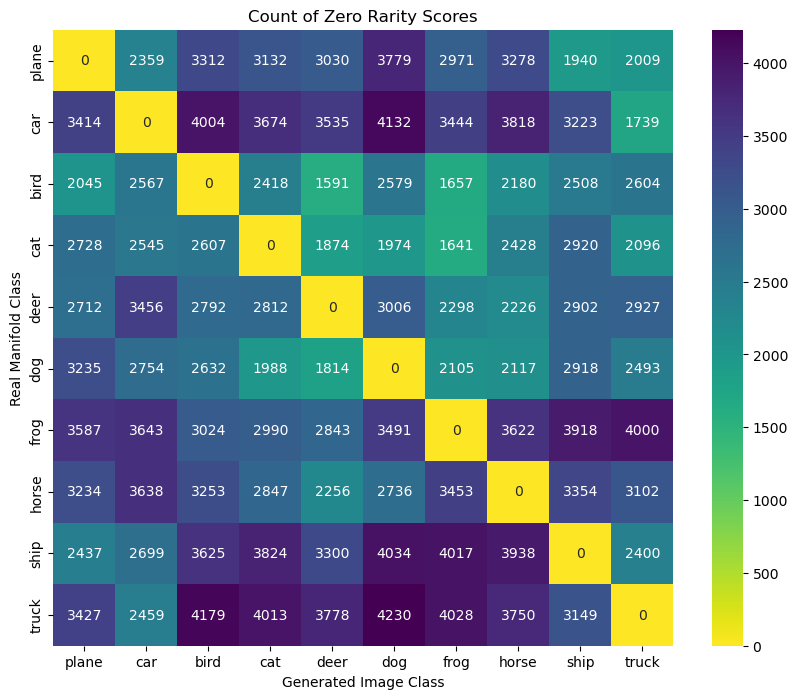

matrix mean:  2672.2
[[   0 2359 3312 3132 3030 3779 2971 3278 1940 2009]
 [3414    0 4004 3674 3535 4132 3444 3818 3223 1739]
 [2045 2567    0 2418 1591 2579 1657 2180 2508 2604]
 [2728 2545 2607    0 1874 1974 1641 2428 2920 2096]
 [2712 3456 2792 2812    0 3006 2298 2226 2902 2927]
 [3235 2754 2632 1988 1814    0 2105 2117 2918 2493]
 [3587 3643 3024 2990 2843 3491    0 3622 3918 4000]
 [3234 3638 3253 2847 2256 2736 3453    0 3354 3102]
 [2437 2699 3625 3824 3300 4034 4017 3938    0 2400]
 [3427 2459 4179 4013 3778 4230 4028 3750 3149    0]]


In [7]:
zero_scores_count_matrix = np.zeros((10, 10))

for filename in os.listdir('./'):
    # Extract the class numbers
    if filename.endswith("score.txt"):
        _, gen_class, real_class, _ = filename.split('_')
        _, real_class = real_class.split('against')
        # real_class = real_class.removesuffix(".txt")
        real_class, gen_class = int(real_class), int(gen_class)
        
        # Count the zero scores
        scores = np.loadtxt(filename)
        zero_count = np.sum(scores == 0)
        
        zero_scores_count_matrix[real_class][gen_class] = zero_count

zero_scores_count_matrix = zero_scores_count_matrix.astype(int)

plt.figure(figsize=(10,8))
sns.heatmap(zero_scores_count_matrix, annot=True, fmt="d", cmap='viridis_r', 
            xticklabels=classDict.keys(), yticklabels=classDict.keys())
plt.title('Count of Zero Rarity Scores')
plt.xlabel('Generated Image Class')
plt.ylabel('Real Manifold Class')
plt.show()
print("matrix mean: ",np.mean(zero_scores_count_matrix))
print(zero_scores_count_matrix)


# Pairs of Classes Comparison (line plot)

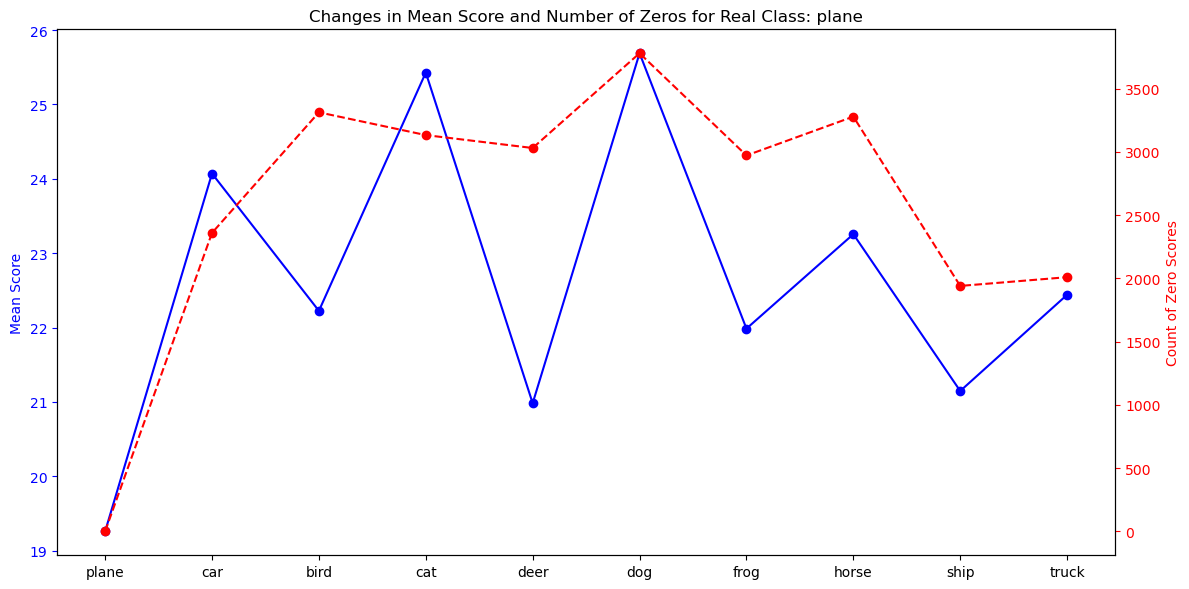

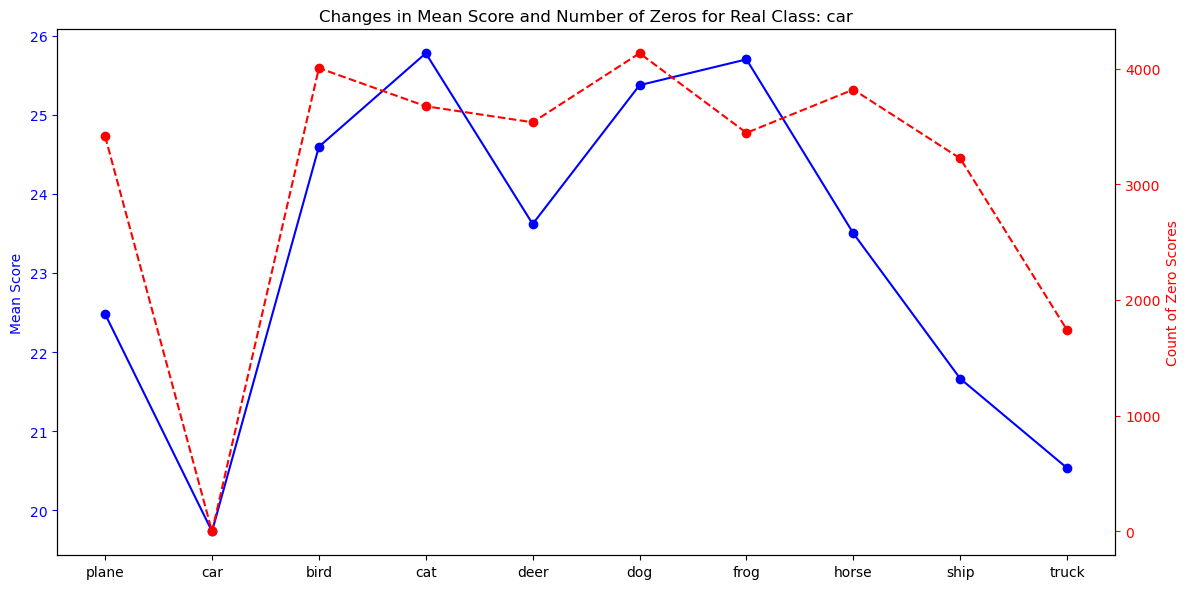

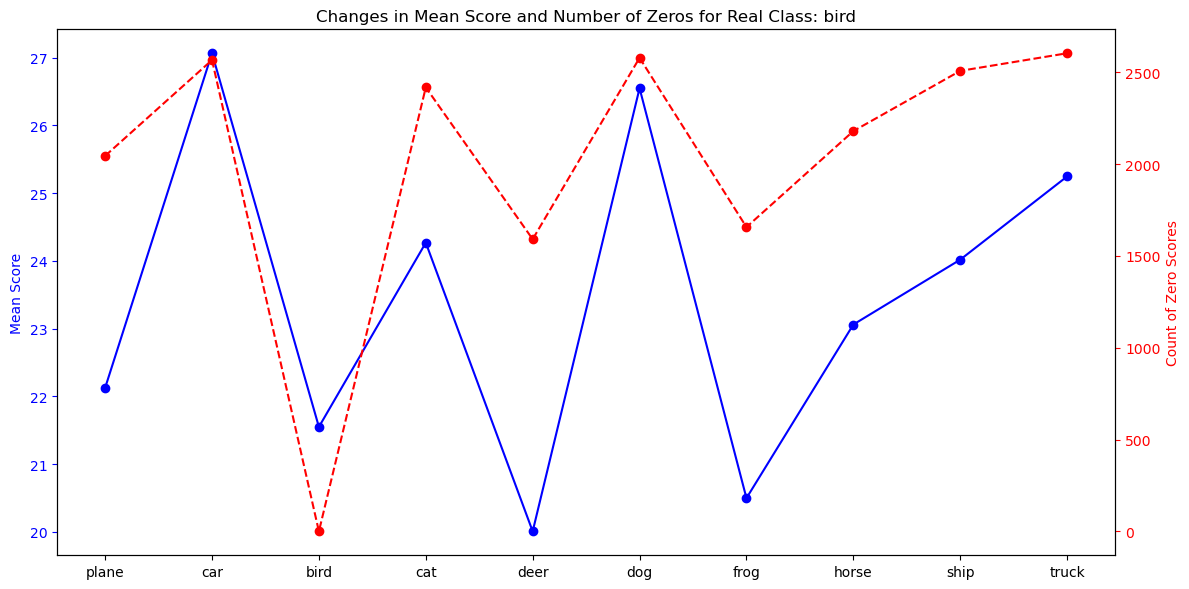

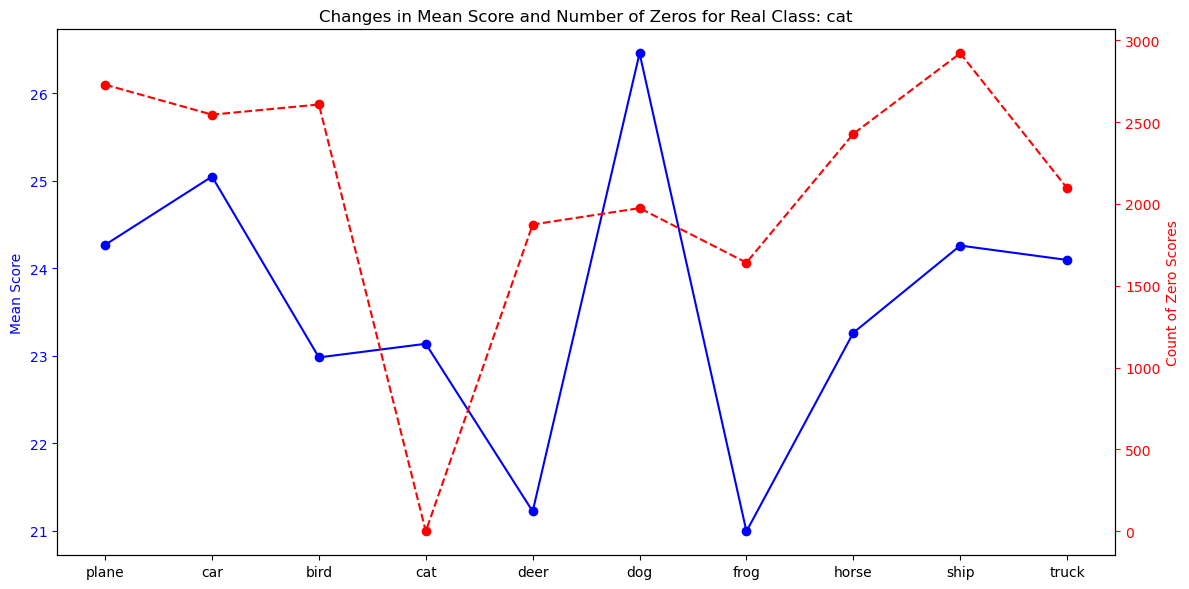

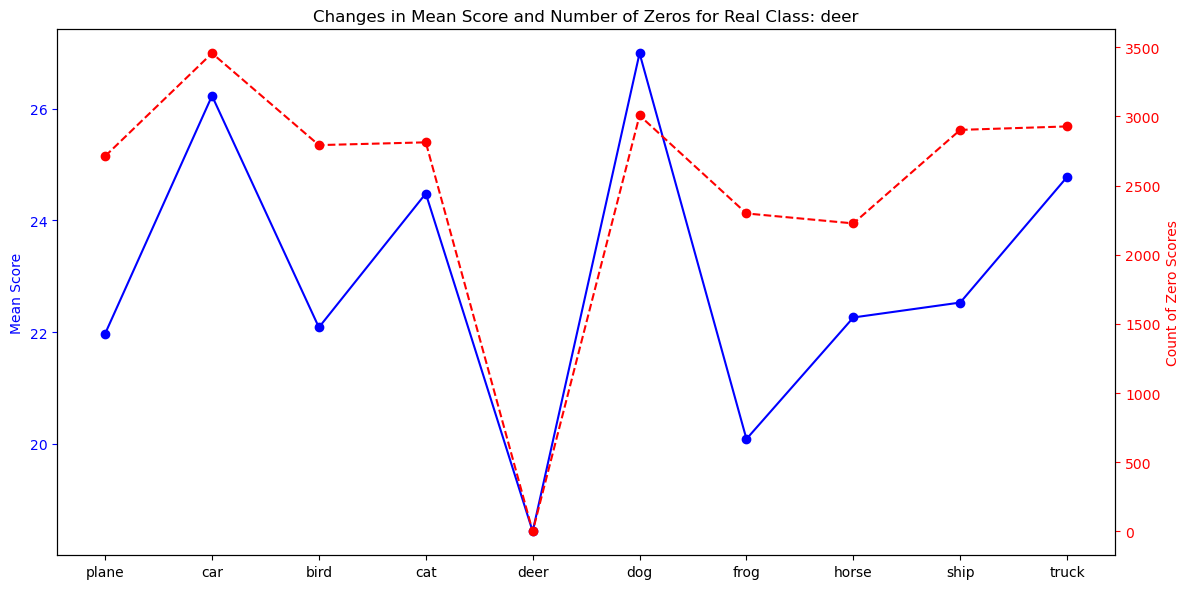

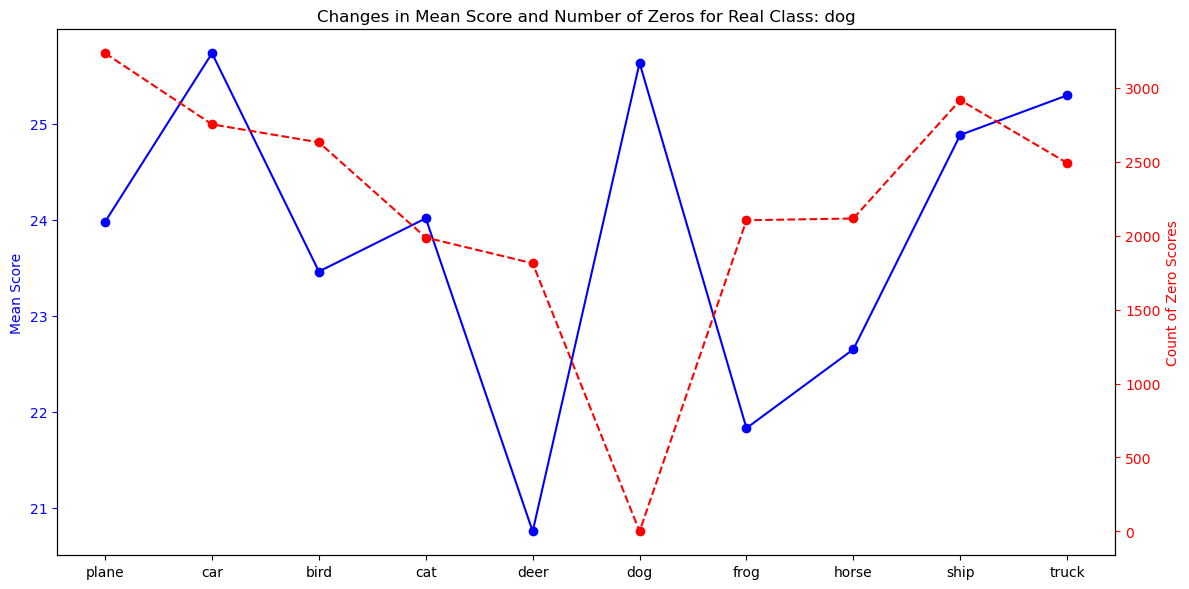

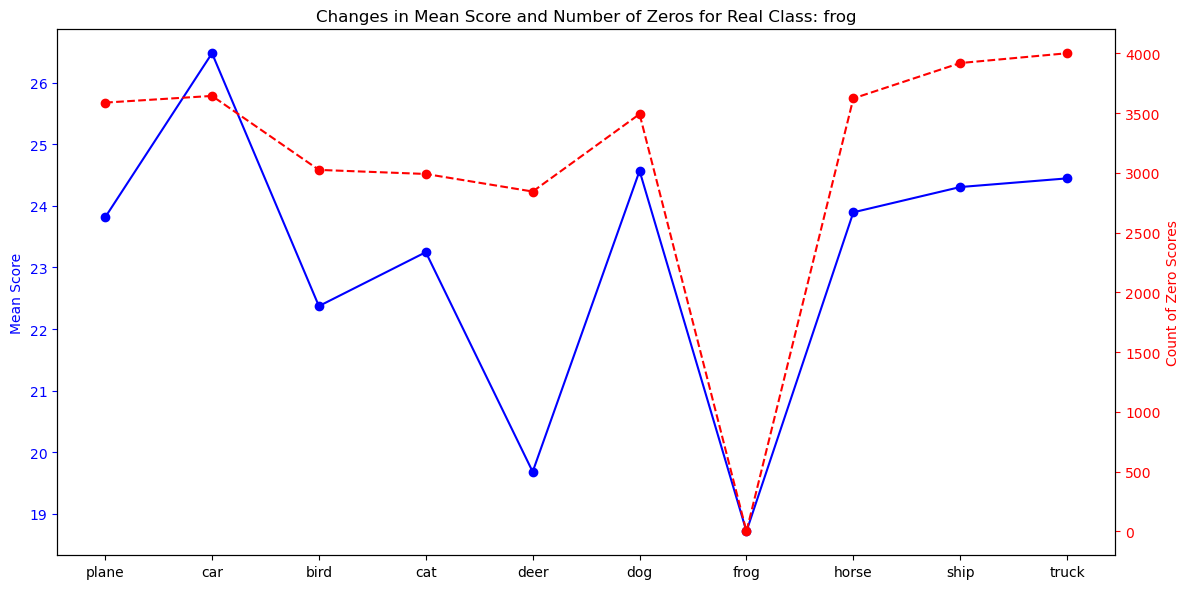

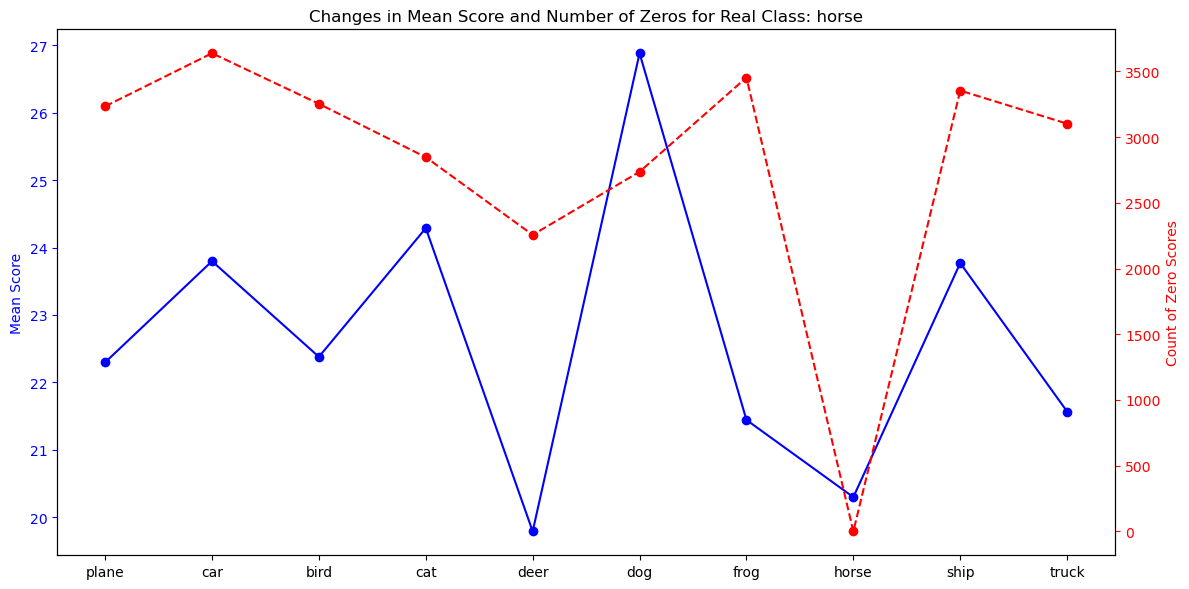

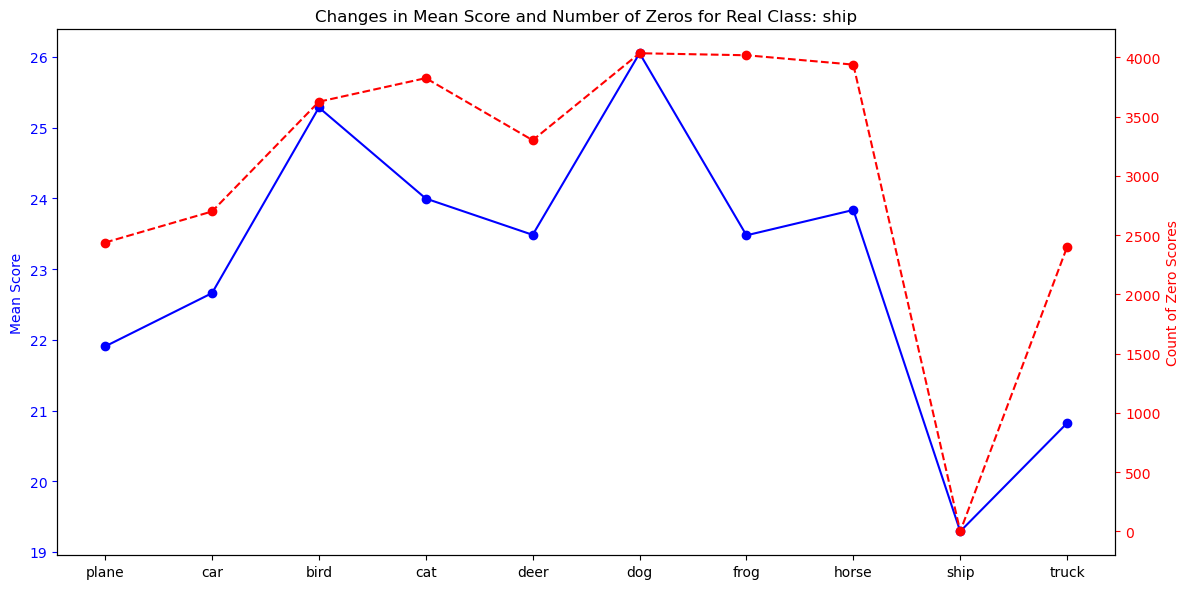

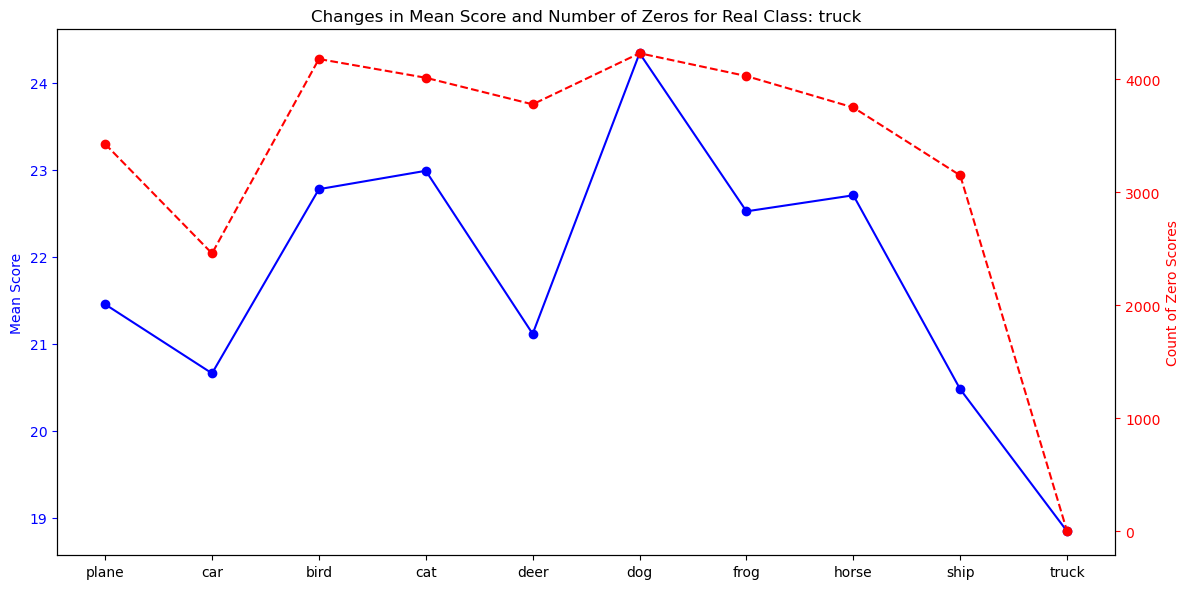

In [8]:
class_names = list(classDict.keys())

# Iterate through each real class
for i, real_class in enumerate(class_names):
    plt.figure(figsize=(12, 6))
    
    # Left y-axis represents the mean score
    plt.plot(class_names, mean_scores_matrix[i], color='b', marker='o', label='Mean Rarity Score')
    plt.ylabel('Mean Score', color='b')
    plt.tick_params('y', colors='b')
    
    # Second y-axis for the number of zeros
    ax2 = plt.twinx()
    ax2.plot(class_names, zero_scores_count_matrix[i], color='r', marker='o', linestyle='--', label='Number of Zeros')
    ax2.set_ylabel('Count of Zero Scores', color='r')
    ax2.tick_params('y', colors='r')
    
    plt.title(f'Changes in Mean Score and Number of Zeros for Real Class: {real_class}')
    plt.xlabel('Generated Class')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
